In [1]:
#Datasets:


In [5]:
! hadoop fs -ls -h  /public/trendytech/orders/orders_1gb.csv


-rw-r--r--   3 itv005857 supergroup      1.0 G 2023-04-29 14:10 /public/trendytech/orders/orders_1gb.csv


In [7]:
 ! hadoop fs -ls -h /public/trendytech/retail_db/customers

Found 1 items
-rw-r--r--   3 itv005857 supergroup    931.4 K 2023-04-26 16:47 /public/trendytech/retail_db/customers/part-00000


In [8]:
! hadoop fs -head  /public/trendytech/orders/orders_1gb.csv


1,2013-07-25 00:00:00.0,11599,CLOSED
2,2013-07-25 00:00:00.0,256,PENDING_PAYMENT
3,2013-07-25 00:00:00.0,12111,COMPLETE
4,2013-07-25 00:00:00.0,8827,CLOSED
5,2013-07-25 00:00:00.0,11318,COMPLETE
6,2013-07-25 00:00:00.0,7130,COMPLETE
7,2013-07-25 00:00:00.0,4530,COMPLETE
8,2013-07-25 00:00:00.0,2911,PROCESSING
9,2013-07-25 00:00:00.0,5657,PENDING_PAYMENT
10,2013-07-25 00:00:00.0,5648,PENDING_PAYMENT
11,2013-07-25 00:00:00.0,918,PAYMENT_REVIEW
12,2013-07-25 00:00:00.0,1837,CLOSED
13,2013-07-25 00:00:00.0,9149,PENDING_PAYMENT
14,2013-07-25 00:00:00.0,9842,PROCESSING
15,2013-07-25 00:00:00.0,2568,COMPLETE
16,2013-07-25 00:00:00.0,7276,PENDING_PAYMENT
17,2013-07-25 00:00:00.0,2667,COMPLETE
18,2013-07-25 00:00:00.0,1205,CLOSED
19,2013-07-25 00:00:00.0,9488,PENDING_PAYMENT
20,2013-07-25 00:00:00.0,9198,PROCESSING
21,2013-07-25 00:00:00.0,2711,PENDING
22,2013-07-25 00:00:00.0,333,COMPLETE
23,2013-07-25 00:00:00.0,4367,PENDING_PAYMENT
24,2013-07-25 00:00:00.0,11441,CLOSED
25,2013-07-25 00:00:00

In [10]:
! hadoop fs -head  /public/trendytech/retail_db/customers/part-00000


1,Richard,Hernandez,XXXXXXXXX,XXXXXXXXX,6303 Heather Plaza,Brownsville,TX,78521
2,Mary,Barrett,XXXXXXXXX,XXXXXXXXX,9526 Noble Embers Ridge,Littleton,CO,80126
3,Ann,Smith,XXXXXXXXX,XXXXXXXXX,3422 Blue Pioneer Bend,Caguas,PR,00725
4,Mary,Jones,XXXXXXXXX,XXXXXXXXX,8324 Little Common,San Marcos,CA,92069
5,Robert,Hudson,XXXXXXXXX,XXXXXXXXX,"10 Crystal River Mall ",Caguas,PR,00725
6,Mary,Smith,XXXXXXXXX,XXXXXXXXX,3151 Sleepy Quail Promenade,Passaic,NJ,07055
7,Melissa,Wilcox,XXXXXXXXX,XXXXXXXXX,9453 High Concession,Caguas,PR,00725
8,Megan,Smith,XXXXXXXXX,XXXXXXXXX,3047 Foggy Forest Plaza,Lawrence,MA,01841
9,Mary,Perez,XXXXXXXXX,XXXXXXXXX,3616 Quaking Street,Caguas,PR,00725
10,Melissa,Smith,XXXXXXXXX,XXXXXXXXX,8598 Harvest Beacon Plaza,Stafford,VA,22554
11,Mary,Huffman,XXXXXXXXX,XXXXXXXXX,3169 Stony Woods,Caguas,PR,00725
12,Christopher,Smith,XXXXXXXXX,XXXXXXXXX,5594 Jagged Embers By-pass,San Antonio,TX,78227
13,Mary,Baldwin,XXXXXXXXX,XXXXXXXXX,7922 Iron Oak Gardens,Caguas,PR,00725
14,Katherine

In [1]:
from pyspark.sql import SparkSession

In [2]:
import getpass
username = getpass.getuser()
spark = SparkSession. \
builder. \
config('spark.ui.port', '0'). \
config('spark.shuffle.useOldFetchProtocol', 'true'). \
config("spark.sql.warehouse.dir", f"/user/{username}/warehouse"). \
enableHiveSupport(). \
master('yarn'). \
getOrCreate()

In [11]:
#join using SPARKSQL and DataFrames

In [15]:
# Defining schema for orders
orders_schema = """
    order_id long, 
    order_date string, 
    customer_id long, 
    order_status string
"""

# Loading orders data with the specified schema
orders_df = spark.read \
    .format("csv") \
    .schema(orders_schema) \
    .load("/public/trendytech/orders/orders_1gb.csv")

# Defining schema for customers
customer_schema = """
    customer_id long, 
    customer_fname string, 
    customer_lname string, 
    user_name string, 
    password string, 
    address string, 
    city string, 
    state string, 
    pincode long
"""

# Loading customers data with the specified schema
customers_df = spark.read \
    .format("csv") \
    .schema(customer_schema) \
    .load("/public/trendytech/retail_db/customers")


In [17]:
#Showing Dataframes:

In [18]:
orders_df.show(10)

+--------+--------------------+-----------+---------------+
|order_id|          order_date|customer_id|   order_status|
+--------+--------------------+-----------+---------------+
|       1|2013-07-25 00:00:...|      11599|         CLOSED|
|       2|2013-07-25 00:00:...|        256|PENDING_PAYMENT|
|       3|2013-07-25 00:00:...|      12111|       COMPLETE|
|       4|2013-07-25 00:00:...|       8827|         CLOSED|
|       5|2013-07-25 00:00:...|      11318|       COMPLETE|
|       6|2013-07-25 00:00:...|       7130|       COMPLETE|
|       7|2013-07-25 00:00:...|       4530|       COMPLETE|
|       8|2013-07-25 00:00:...|       2911|     PROCESSING|
|       9|2013-07-25 00:00:...|       5657|PENDING_PAYMENT|
|      10|2013-07-25 00:00:...|       5648|PENDING_PAYMENT|
+--------+--------------------+-----------+---------------+
only showing top 10 rows



In [19]:
customers_df.show(10)

+-----------+--------------+--------------+---------+---------+--------------------+-----------+-----+-------+
|customer_id|customer_fname|customer_lname|user_name| password|             address|       city|state|pincode|
+-----------+--------------+--------------+---------+---------+--------------------+-----------+-----+-------+
|          1|       Richard|     Hernandez|XXXXXXXXX|XXXXXXXXX|  6303 Heather Plaza|Brownsville|   TX|  78521|
|          2|          Mary|       Barrett|XXXXXXXXX|XXXXXXXXX|9526 Noble Embers...|  Littleton|   CO|  80126|
|          3|           Ann|         Smith|XXXXXXXXX|XXXXXXXXX|3422 Blue Pioneer...|     Caguas|   PR|    725|
|          4|          Mary|         Jones|XXXXXXXXX|XXXXXXXXX|  8324 Little Common| San Marcos|   CA|  92069|
|          5|        Robert|        Hudson|XXXXXXXXX|XXXXXXXXX|10 Crystal River ...|     Caguas|   PR|    725|
|          6|          Mary|         Smith|XXXXXXXXX|XXXXXXXXX|3151 Sleepy Quail...|    Passaic|   NJ|   7055|
|

In [23]:
# Creating temporary views for SQL querying
orders_df.createOrReplaceTempView("orders")
customers_df.createOrReplaceTempView("customers")

# Running SQL query to perform inner join on orders and customers tables
joined_sql_df = spark.sql("""
    SELECT * 
    FROM orders 
    INNER JOIN customers 
    ON orders.customer_id = customers.customer_id
""")

# Displaying the result of the joined dataframe
joined_sql_df.show(truncate=False)

# Writing the joined dataframe in 'noop' format with overwrite mode (noop format is a placeholder and will not actually write the data)
joined_sql_df.write \
    .format("noop") \
    .mode("overwrite") \
    .save()


+--------+---------------------+-----------+---------------+-----------+--------------+--------------+---------+---------+--------------------------+-------------+-----+-------+
|order_id|order_date           |customer_id|order_status   |customer_id|customer_fname|customer_lname|user_name|password |address                   |city         |state|pincode|
+--------+---------------------+-----------+---------------+-----------+--------------+--------------+---------+---------+--------------------------+-------------+-----+-------+
|1       |2013-07-25 00:00:00.0|11599      |CLOSED         |11599      |Mary          |Malone        |XXXXXXXXX|XXXXXXXXX|8708 Indian Horse Highway |Hickory      |NC   |28601  |
|2       |2013-07-25 00:00:00.0|256        |PENDING_PAYMENT|256        |David         |Rodriguez     |XXXXXXXXX|XXXXXXXXX|7605 Tawny Horse Falls    |Chicago      |IL   |60625  |
|3       |2013-07-25 00:00:00.0|12111      |COMPLETE       |12111      |Amber         |Franco        |XXXXXXXX

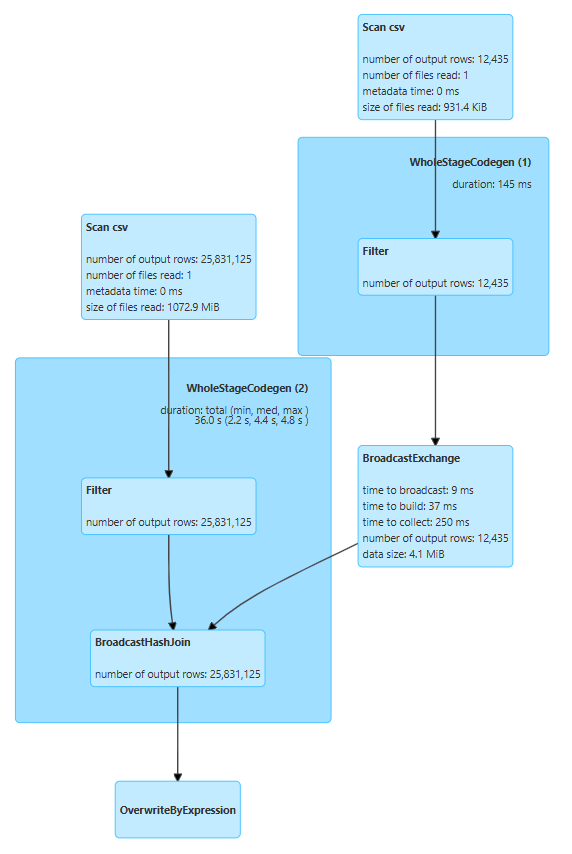

In [20]:
# Performing inner join on orders and customers dataframes based on customer_id
joined_df = orders_df.join(customers_df, orders_df.customer_id == customers_df.customer_id, "inner")

joined_df.write \
    .format("noop") \
    .mode("overwrite") \
    .save()


In [22]:
joined_df.show(10)

+--------+--------------------+-----------+---------------+-----------+--------------+--------------+---------+---------+--------------------+-----------+-----+-------+
|order_id|          order_date|customer_id|   order_status|customer_id|customer_fname|customer_lname|user_name| password|             address|       city|state|pincode|
+--------+--------------------+-----------+---------------+-----------+--------------+--------------+---------+---------+--------------------+-----------+-----+-------+
|       1|2013-07-25 00:00:...|      11599|         CLOSED|      11599|          Mary|        Malone|XXXXXXXXX|XXXXXXXXX|8708 Indian Horse...|    Hickory|   NC|  28601|
|       2|2013-07-25 00:00:...|        256|PENDING_PAYMENT|        256|         David|     Rodriguez|XXXXXXXXX|XXXXXXXXX|7605 Tawny Horse ...|    Chicago|   IL|  60625|
|       3|2013-07-25 00:00:...|      12111|       COMPLETE|      12111|         Amber|        Franco|XXXXXXXXX|XXXXXXXXX|8766 Clear Prairi...| Santa Cruz| 

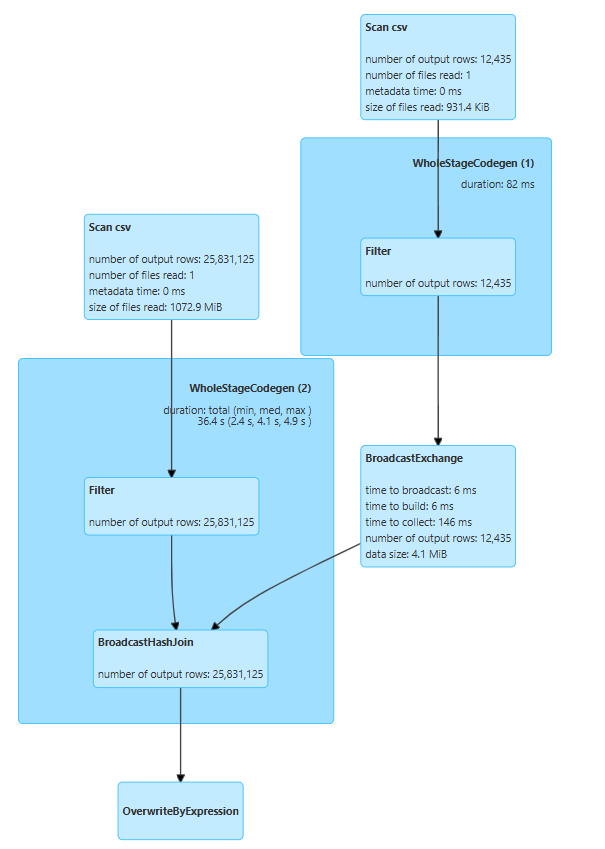

In [27]:
# This code performs the following:
# 1. Retrieves and disables the auto broadcast join threshold to avoid automatic broadcast joins.
# 2. Performs an inner join between orders_df and customers_df on customer_id.
# 3. Writes the result in 'noop' format, acting as a placeholder, with overwrite mode.

# Getting the current value of the autoBroadcastJoinThreshold setting
spark.conf.get('spark.sql.autoBroadcastJoinThreshold')

# Setting autoBroadcastJoinThreshold to -1 to disable automatic broadcast joins
spark.conf.set('spark.sql.autoBroadcastJoinThreshold', -1)

# Re-checking the autoBroadcastJoinThreshold setting to confirm the update
spark.conf.get('spark.sql.autoBroadcastJoinThreshold')

# Performing an inner join on orders_df and customers_df using customer_id as the key
orders_df.join(customers_df, orders_df.customer_id == customers_df.customer_id, "inner") \
    .write.format("noop") \
    .mode("overwrite") \
    .save()


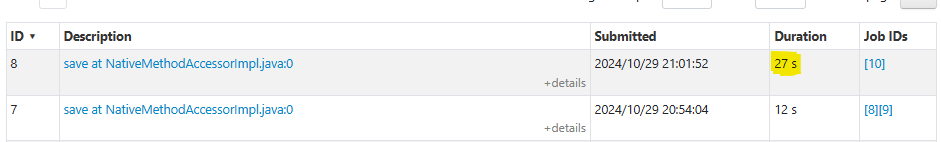

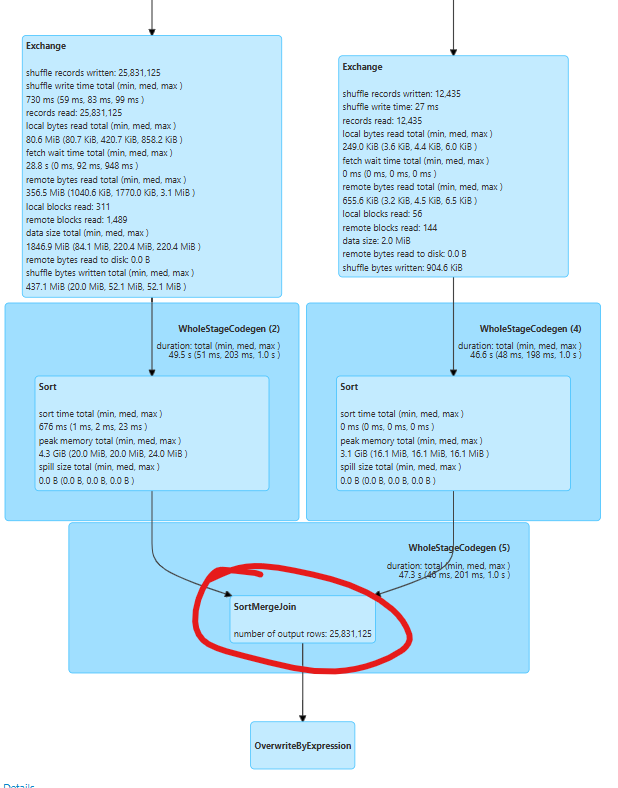

The join took longer due to the SortMergeJoin, which involved significant data shuffling, increasing processing time to 27 seconds. Enabling Broadcast Join (instead of disabling it) could improve performance by reducing shuffling, especially if one table is much smaller than the other.

In [28]:
# This code performs the following:
# 1. Specifies a join hint to use Shuffle Hash Join on customers_df for joining.
# 2. Performs an inner join between orders_df and customers_df on customer_id.
# 3. Writes the result in 'noop' format, acting as a placeholder, with overwrite mode.

orders_df.join(customers_df.hint("shuffle_hash"), orders_df.customer_id == customers_df.customer_id, "inner") \
    .write.format("noop") \
    .mode("overwrite") \
    .save()


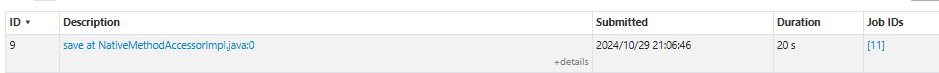

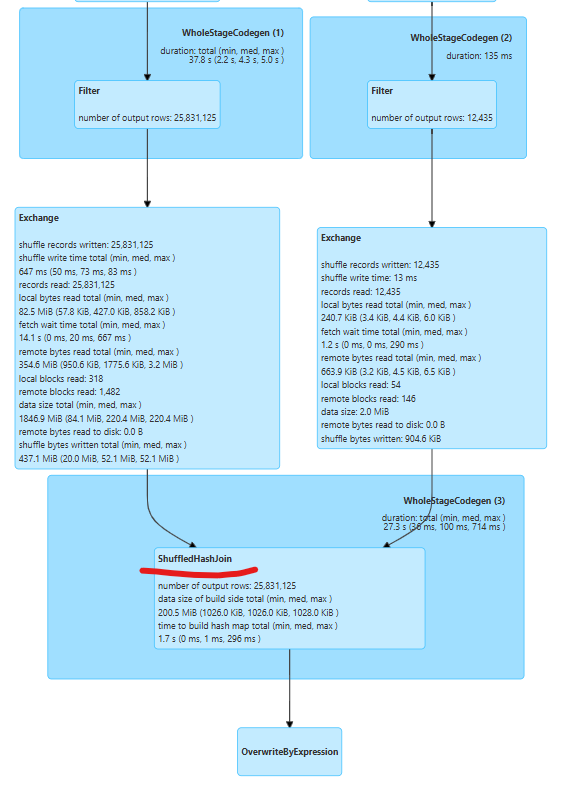

The Shuffle Hash Join took less time (20 seconds) compared to Sort Merge Join (27 seconds) due to reduced data sorting. Shuffle Hash Join builds a hash map for one side of the join, making it more efficient for joins where one table is small.

In [30]:


# Checking if Adaptive Query Execution (AQE) is enabled
spark.conf.get("spark.sql.adaptive.enabled")

'true'

In [32]:
spark.conf.set("spark.sql.adaptive.enabled", False)

# Defining schema for orders
orders_schema = "order_id long , order_date string, customer_id long, order_status string"

# Loading orders data with the specified schema
orders_df = spark.read \
    .format("csv") \
    .schema(orders_schema) \
    .load("/public/trendytech/orders/orders_1gb.csv")

# Defining schema for customers
customer_schema = """
    customer_id long, 
    customer_fname string, 
    customer_lname string, 
    user_name string,
    password string, 
    address string, 
    city string, 
    state string, 
    pincode long
"""

# Loading customers data with the specified schema
customers_df = spark.read \
    .format("csv") \
    .schema(customer_schema) \
    .load("/public/trendytech/retail_db/customers")

# Disabling auto broadcast join threshold to prevent automatic broadcast joins
spark.conf.set('spark.sql.autoBroadcastJoinThreshold', -1)

In [33]:
orders_df.join(customers_df, orders_df.customer_id == customers_df.customer_id, "inner") \
    .write.format("noop") \
    .mode("overwrite") \
    .save()

orders_df.join(customers_df.hint("shuffle_hash"), orders_df.customer_id == customers_df.customer_id, "inner") \
    .write.format("noop") \
    .mode("overwrite") \
    .save()

when AQE was enabled: 
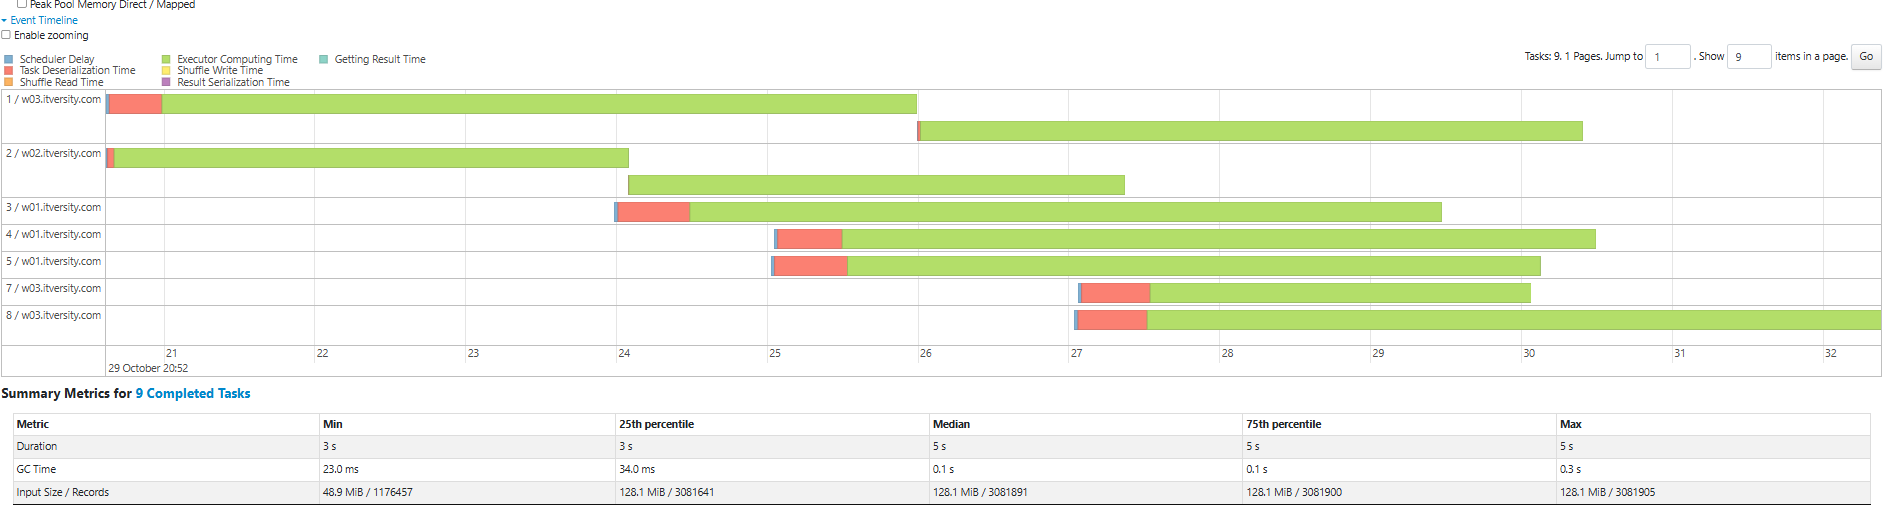

when AQE was disabled:
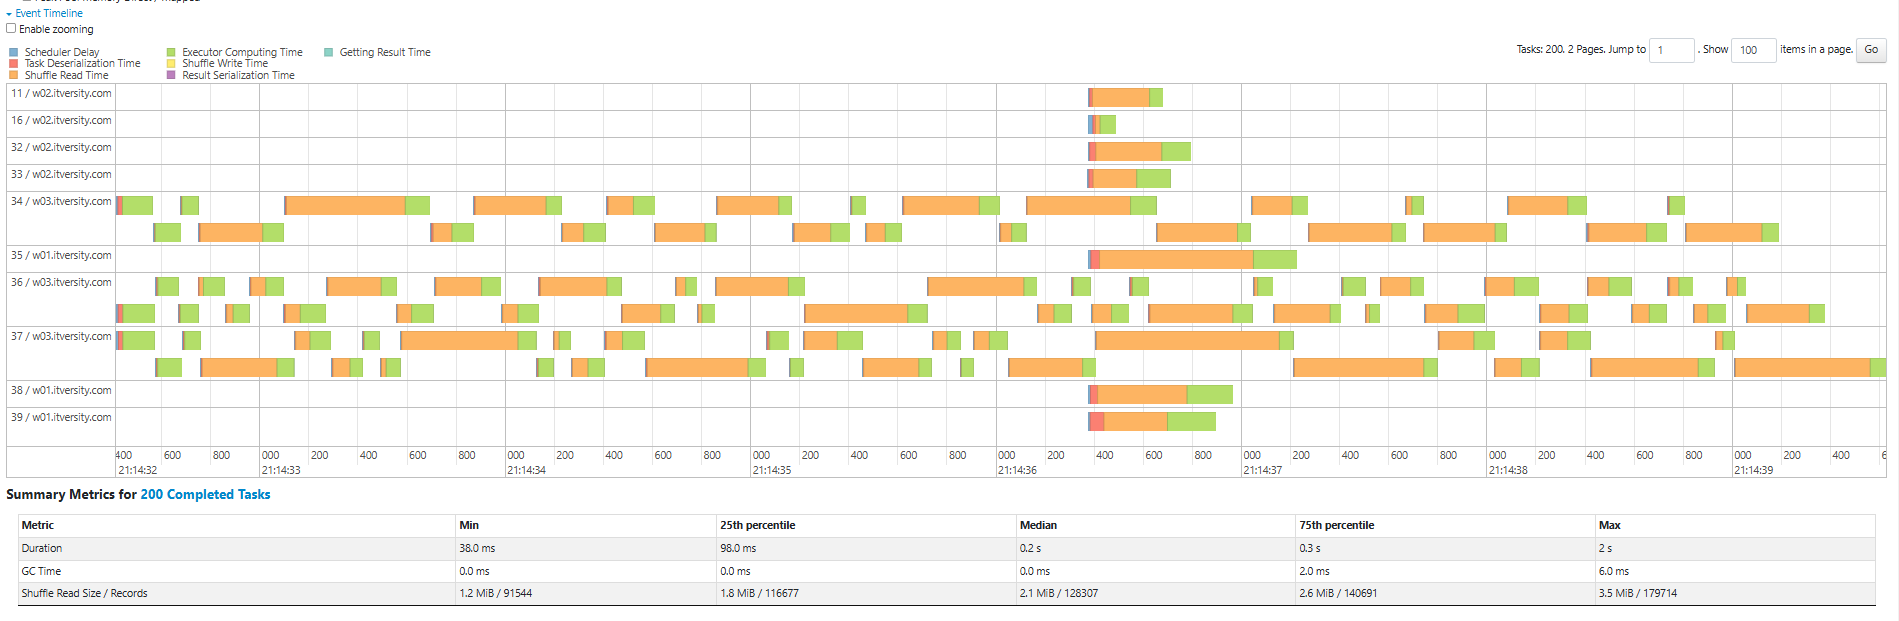

With AQE enabled, Spark dynamically adjusts join strategies, partition sizes, and handles data skew, leading to improved performance and reduced shuffle overhead. Without AQE, Spark follows a static execution plan, which can be less efficient for large or unevenly distributed data. AQE thus provides flexibility and optimizes resource usage.

In [3]:
#semi join

In [4]:
employee_data = [(10, "Raj","1999","100","M",2000),
(20, "Rahul","2002","200","M",2000),
(30, "Raghav","2010","100","",2000),
(40, "Reema","2004","100","F",2000),
(50, "Rina","2008","400","F",2000),
(60, "Rasul","2014","500","M",2000)
]
employee_schema = ["employee_id","name","doj","employee_dept_id","gender","salary"]
employeeDf = spark.createDataFrame(data=employee_data,schema=employee_schema)
employeeDf.show()

+-----------+------+----+----------------+------+------+
|employee_id|  name| doj|employee_dept_id|gender|salary|
+-----------+------+----+----------------+------+------+
|         10|   Raj|1999|             100|     M|  2000|
|         20| Rahul|2002|             200|     M|  2000|
|         30|Raghav|2010|             100|      |  2000|
|         40| Reema|2004|             100|     F|  2000|
|         50|  Rina|2008|             400|     F|  2000|
|         60| Rasul|2014|             500|     M|  2000|
+-----------+------+----+----------------+------+------+



In [6]:
department_data = [("HR",100),
("Supply",100),
("Sales",100),
("Stock",100),
]
department_schema = ["dept_name","dept_id"]
departmentDf = spark.createDataFrame(data=department_data,schema=department_schema)
departmentDf.show()

+---------+-------+
|dept_name|dept_id|
+---------+-------+
|       HR|    100|
|   Supply|    100|
|    Sales|    100|
|    Stock|    100|
+---------+-------+



In [7]:
df_join = employeeDf.join(departmentDf,employeeDf.employee_dept_id == departmentDf.dept_id, "Semi")

In [8]:
df_join.show()

+-----------+------+----+----------------+------+------+
|employee_id|  name| doj|employee_dept_id|gender|salary|
+-----------+------+----+----------------+------+------+
|         10|   Raj|1999|             100|     M|  2000|
|         30|Raghav|2010|             100|      |  2000|
|         40| Reema|2004|             100|     F|  2000|
+-----------+------+----+----------------+------+------+



In this example, the semi join between employeeDF and departmentDF selects rows from employeeDF where a matching employee_dept_id exists in departmentDF, but it does not include columns from departmentDF in the result. Only employees from departments present in departmentDF with dept_id = 100 are shown in the output.

Other Use Cases:

Filter Orders by Customer IDs: Use a semi join to find orders that have customer IDs matching those in a customer list, without needing customer details.
Filter Transactions by Approved Accounts: Select only those transactions with account IDs present in an "approved accounts" list.
Identify Active Products: Retrieve sales data only for active products by performing a semi join between sales and an active products list.